In [1]:
#google
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
#import packages
import os
import tensorflow as tf
import keras
from keras import layers
from keras.models import Model
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D, GlobalMaxPooling2D
from sklearn.preprocessing import LabelBinarizer
from keras.callbacks import ModelCheckpoint
from keras.optimizers import RMSprop, SGD, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

Using TensorFlow backend.


In [0]:
#load dataset
train_path = '/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment_2/dataset1/train/' #80
valid_path = '/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment_2/dataset1/val/' #10
test_path = '/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment_2/dataset1/test/' #10

In [0]:
#ImageGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
#datagen flow for multi-class
train_generator = train_datagen.flow_from_directory(train_path, target_size=(224,224),
    class_mode='categorical', batch_size=8)
valid_generator = test_datagen.flow_from_directory(valid_path, target_size=(224,224),
    class_mode='categorical', batch_size=8)
test_generator = test_datagen.flow_from_directory(test_path, target_size=(224,224),
    class_mode='categorical', batch_size=8)

Found 900 images belonging to 4 classes.
Found 113 images belonging to 4 classes.
Found 112 images belonging to 4 classes.


In [0]:
#VGG16
model = VGG16(weights= None, include_top=True, classes=4, input_shape=(224,224,3))

In [0]:
#compile model
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-5), metrics=['acc'])

In [8]:
#train model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  
      epochs=25,
      validation_data=valid_generator,
      validation_steps=10,  
      verbose=1)

Epoch 1/25
100/100 [==============================] - 325s 3s/step - loss: 1.1387 - acc: 0.5163 - val_loss: 0.7010 - val_acc: 0.6000
Epoch 2/25
100/100 [==============================] - 56s 562ms/step - loss: 0.7602 - acc: 0.6477 - val_loss: 0.2319 - val_acc: 0.7808
Epoch 3/25
100/100 [==============================] - 18s 182ms/step - loss: 0.6220 - acc: 0.7563 - val_loss: 2.2887 - val_acc: 0.7397
Epoch 4/25
100/100 [==============================] - 18s 182ms/step - loss: 0.5733 - acc: 0.7513 - val_loss: 0.2201 - val_acc: 0.8500
Epoch 5/25
100/100 [==============================] - 18s 179ms/step - loss: 0.5521 - acc: 0.7841 - val_loss: 0.6017 - val_acc: 0.7671
Epoch 6/25
100/100 [==============================] - 18s 177ms/step - loss: 0.4740 - acc: 0.7900 - val_loss: 3.7997e-04 - val_acc: 0.8356
Epoch 7/25
100/100 [==============================] - 19s 186ms/step - loss: 0.4808 - acc: 0.7889 - val_loss: 0.2614 - val_acc: 0.8750
Epoch 8/25
100/100 [==============================] -

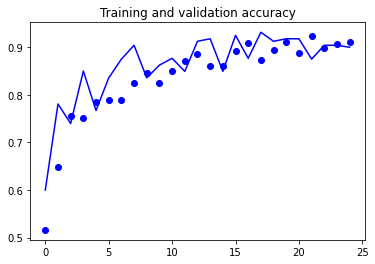

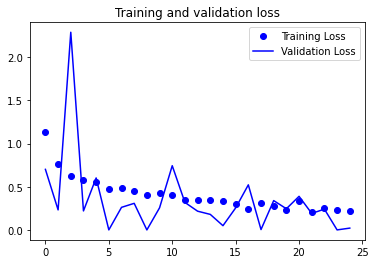

In [9]:
#plot graph
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()